# Evolution of the job market in Switzerland
## Introduction

## Dataset
The dataset used for this analysis come from the [Swiss Job Tracker](https://swissjobtracker.ch/#/). More precisely, it is the [full dataset](https://datenservice.kof.ethz.ch/api/v1/public/collections/ch.kof.jobtracker?mime=csv&df=Y-m-d) and the [data description](https://datenservice.kof.ethz.ch/api/v1/public/metadata/collections/ch.kof.jobtracker?mime=csv) that were used (downloaded on 13.05.2025).

In [1]:
# === importing required packages ===
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and cleaning the data
The dataset have been imported in python. But, since the column names are codes instead of proper names, a correspondance has been made with the names in the data description table. Then the codes in the dataset has been replaced by the actual data names. Finally, for clarity, the dataset has been divided into three tables: one for the cantons, one for the type of job, and one for the industries.

In [2]:
# === import and cleaning of the data ===
# loading files
data = pd.read_csv("original_data/kof_data_export_2025-05-13_14_27_46.csv")
names = pd.read_csv("original_data/kof_data_export_2025-05-13_14_30_15.csv")

# removing the unused columns from the data table
cols_ok = names["ts_key"].tolist()
data = data[["date"] + [col for col in data.columns if col in cols_ok]]

# correspondance dictionnary between data table and variable names table
corr_dict = dict(zip(names["ts_key"], names["Variable"]))

# rename the variables in the data table
data = data.rename(columns={col: corr_dict[col] for col in data.columns if col in corr_dict})

# diplaying the first lines and print the corrected csv data file
# print(data.head())
data.to_csv("corrected_data.csv", index=False)

# dividing data table in dataframes according to the groups
cantons_cols = names[names["Grouped by"] == "Canton"]["Variable"].tolist()
jobs_cols = names[names["Grouped by"] == "Occupation"]["Variable"].tolist()
industries_cols = names[names["Grouped by"] == "Industry"]["Variable"].tolist()

cantons = data[["date"] + [col for col in data.columns if col in cantons_cols]].copy()
jobs = data[["date"] + [col for col in data.columns if col in jobs_cols]].copy()
industries = data[["date"] + [col for col in data.columns if col in industries_cols]].copy()

## Analysis
### Descriptive statistics
Before anything else, the descriptive statistics of the data have been calculated. They are also saved in a JSON file for any ulterior use.

In [3]:
# === descriptive statistics ===
# stats by group
print("Cantons")
print(cantons.describe().transpose().round(2))

print(f"\nJobs")
print(jobs.describe().transpose().round(2))

print(f"\nIndustries")
print(industries.describe().transpose().round(2))

# saving stats in a json file
desc_dict = {
    "Cantons" : cantons.describe().transpose().round(2).to_dict(orient="index"),
    "Jobs" : jobs.describe().transpose().round(2).to_dict(orient="index"),
    "Industries" : industries.describe().transpose().round(2).to_dict(orient="index")
}

with open("json_files/desc_stats.json", "w") as f:
    json.dump(desc_dict, f, indent=4)

Cantons
                        count    mean    std    min     25%     50%     75%  \
Aargau                  382.0  123.90  26.89  84.09   98.51  121.91  149.47   
Appenzell Innerrhoden   382.0  133.36  30.50  86.29  107.63  123.59  157.47   
Appenzell Ausserrhoden  382.0  122.34  22.62  87.85  102.34  115.42  143.36   
Bern                    382.0  125.28  30.16  82.47   94.96  123.24  155.01   
Basel-Landschaft        356.0  123.14  23.53  84.42  100.44  128.36  145.29   
Basel-Stadt             382.0  119.93  25.62  78.94   97.34  123.39  138.72   
Fribourg                382.0  130.27  29.21  83.11  100.78  137.79  158.11   
Genève                  382.0  130.81  33.99  80.33   97.86  125.38  165.97   
Glarus                  382.0  129.96  30.16  87.30  100.09  123.89  157.23   
Grishun                 382.0  141.71  39.91  74.68  101.81  155.66  177.94   
Jura                    382.0  136.77  37.21  83.87   99.14  130.40  174.02   
Luzern                  382.0  128.58  33.93

### Plotting the data
After calculating the descriptive statistics, the data were plotted in line graphs, and in box plots, according to what they are representing (cantons, jobs, industries).

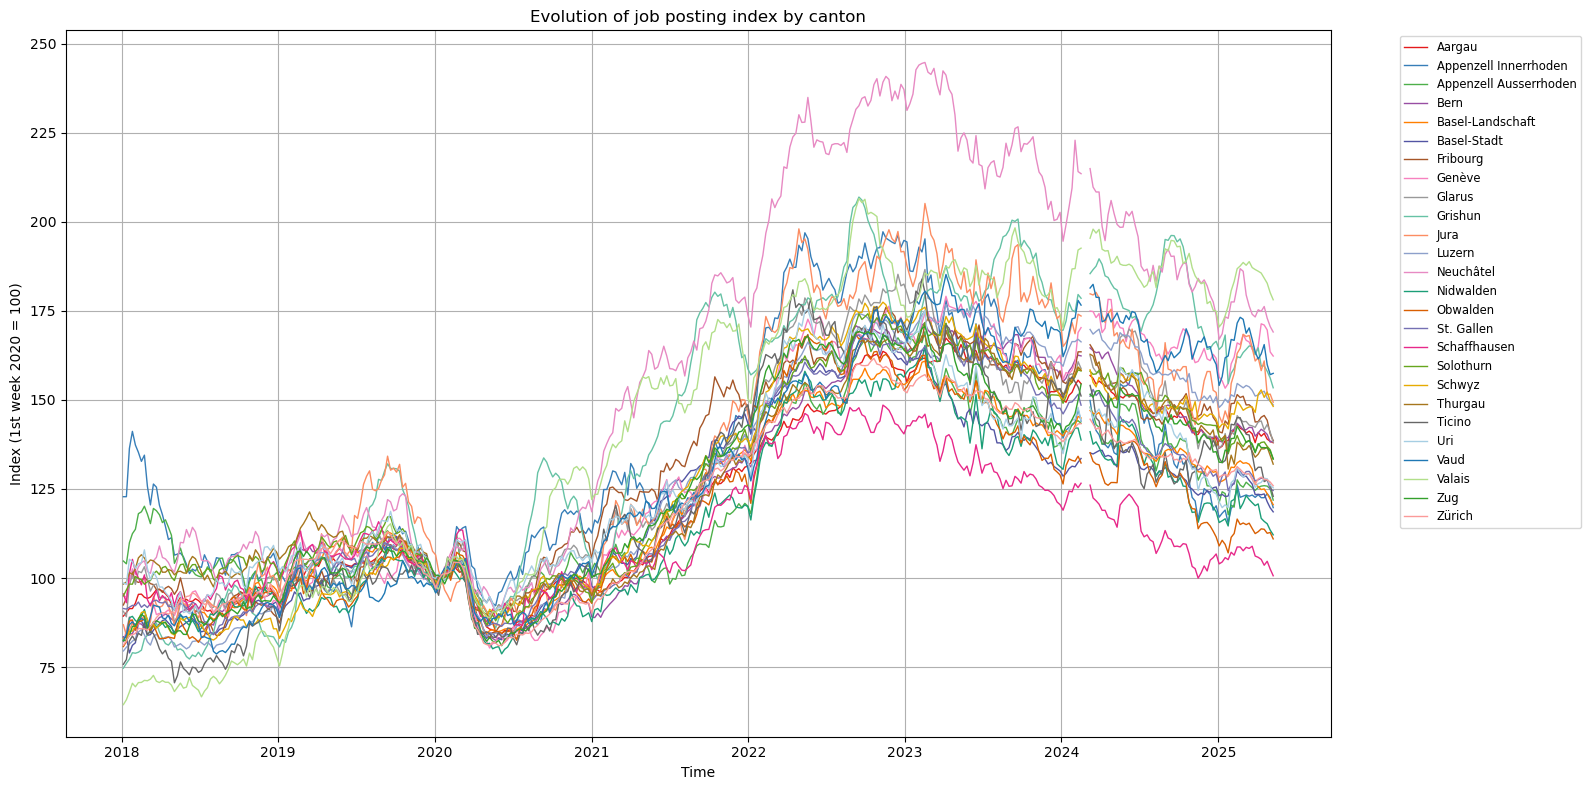

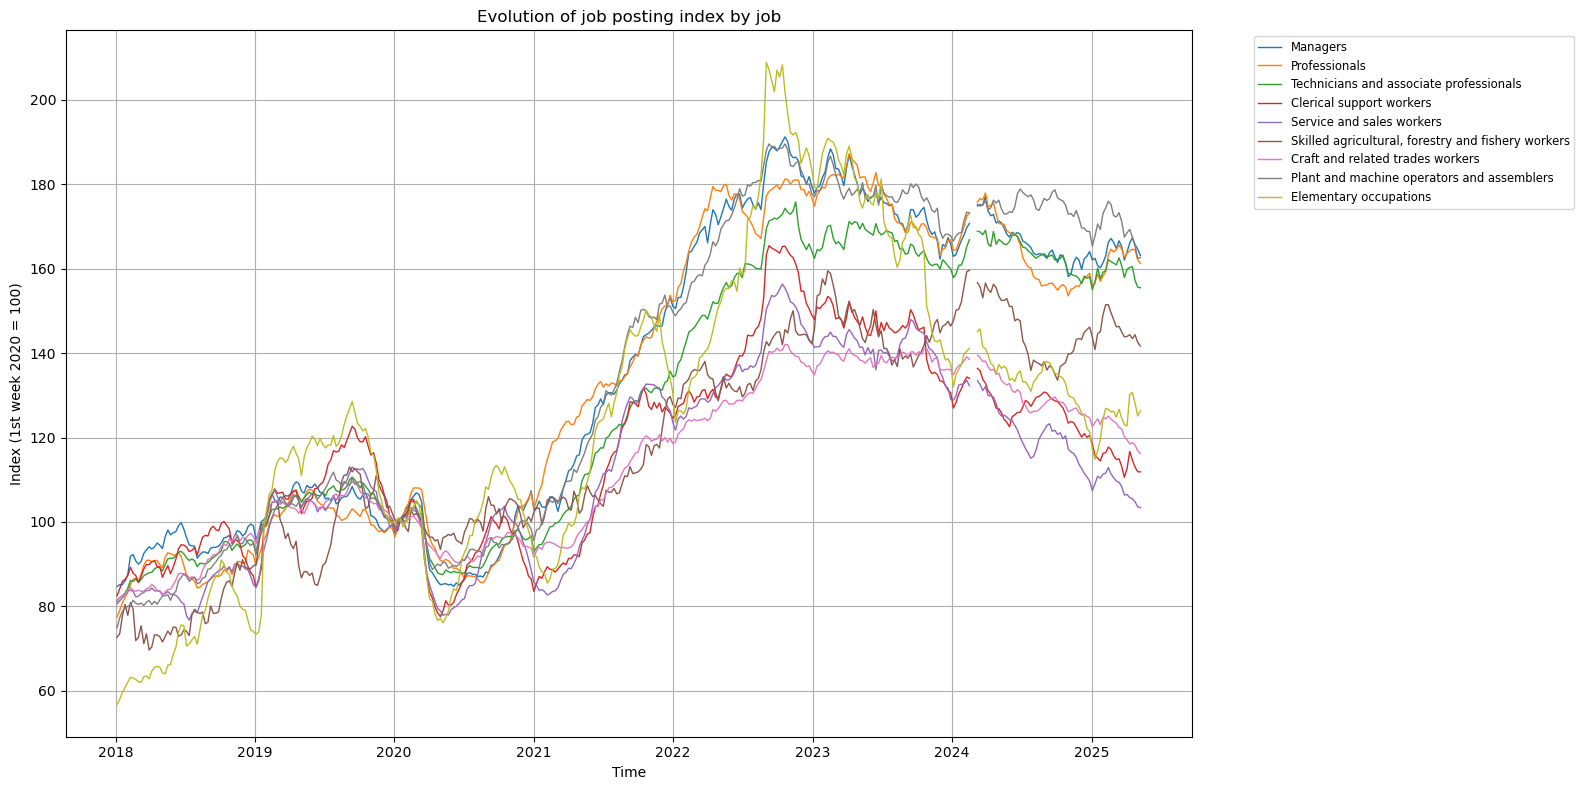

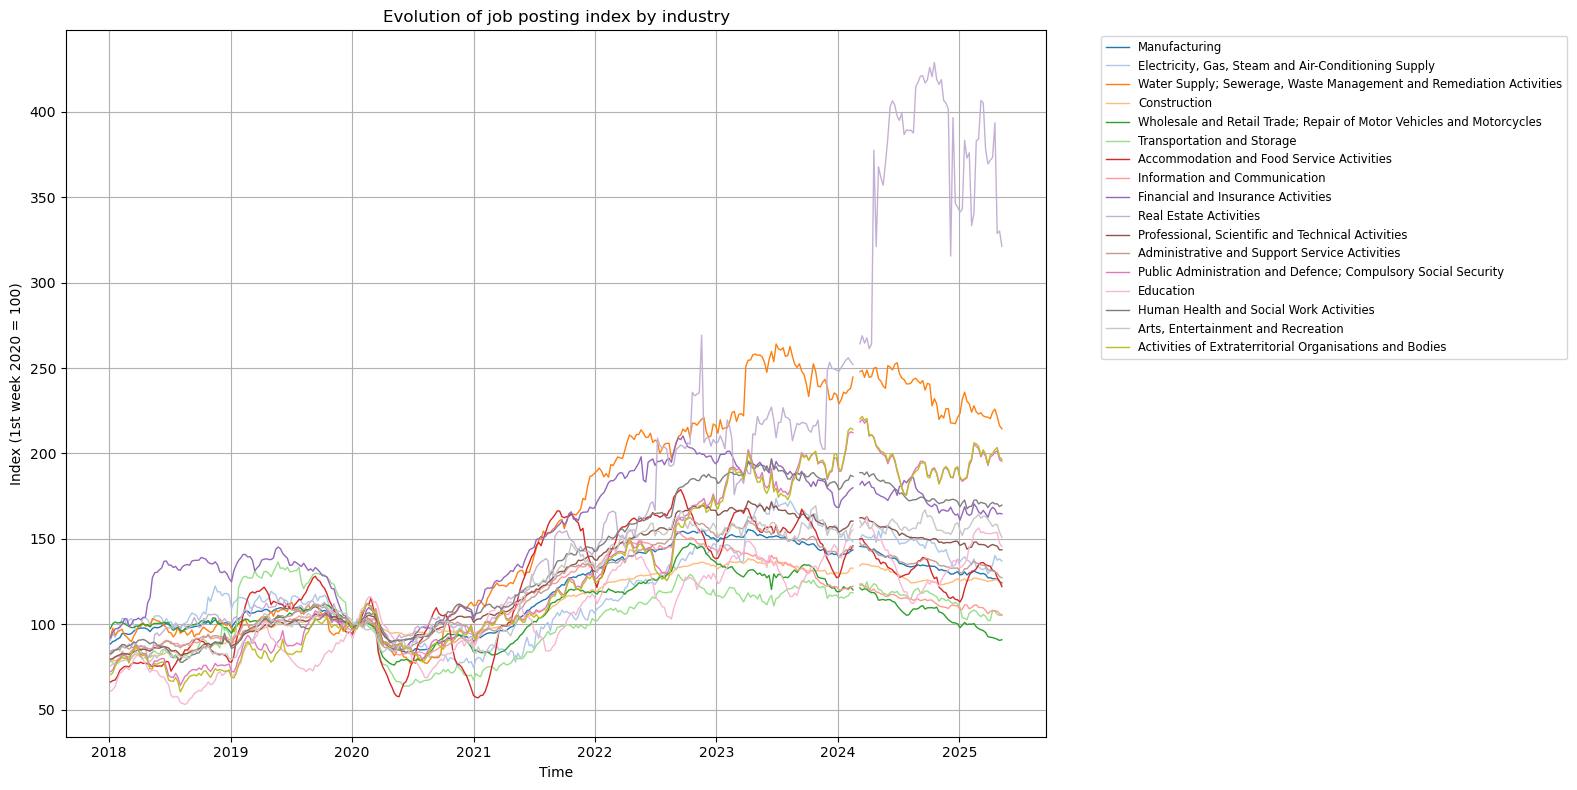

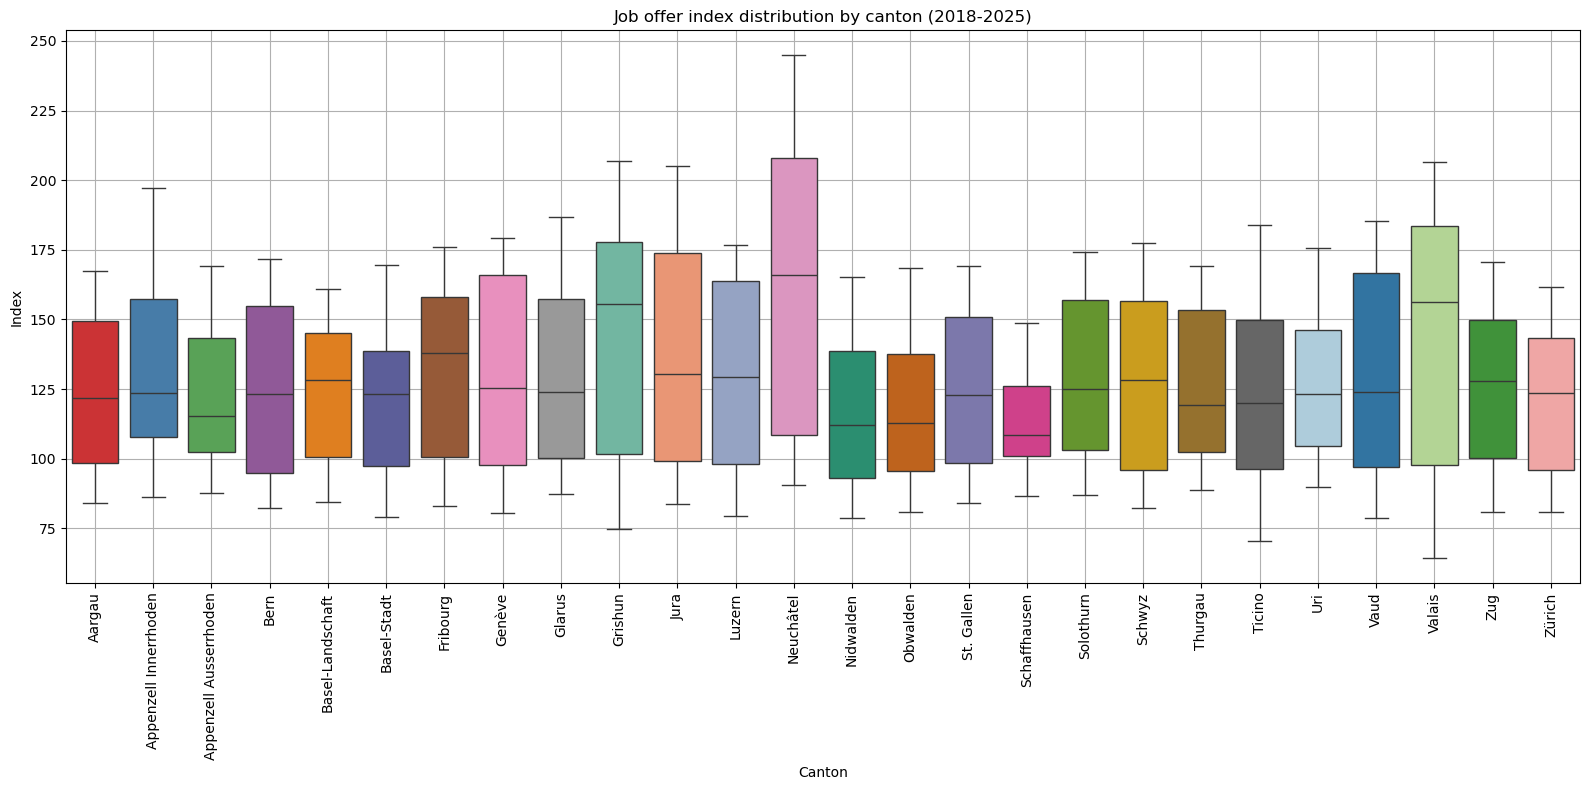

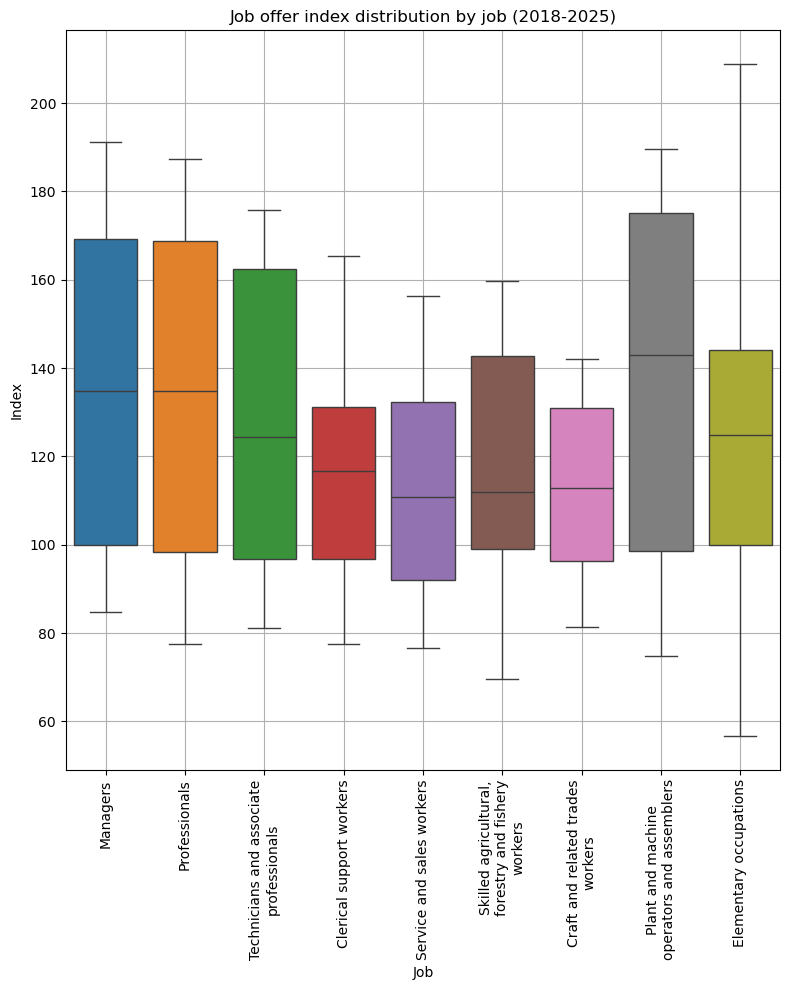

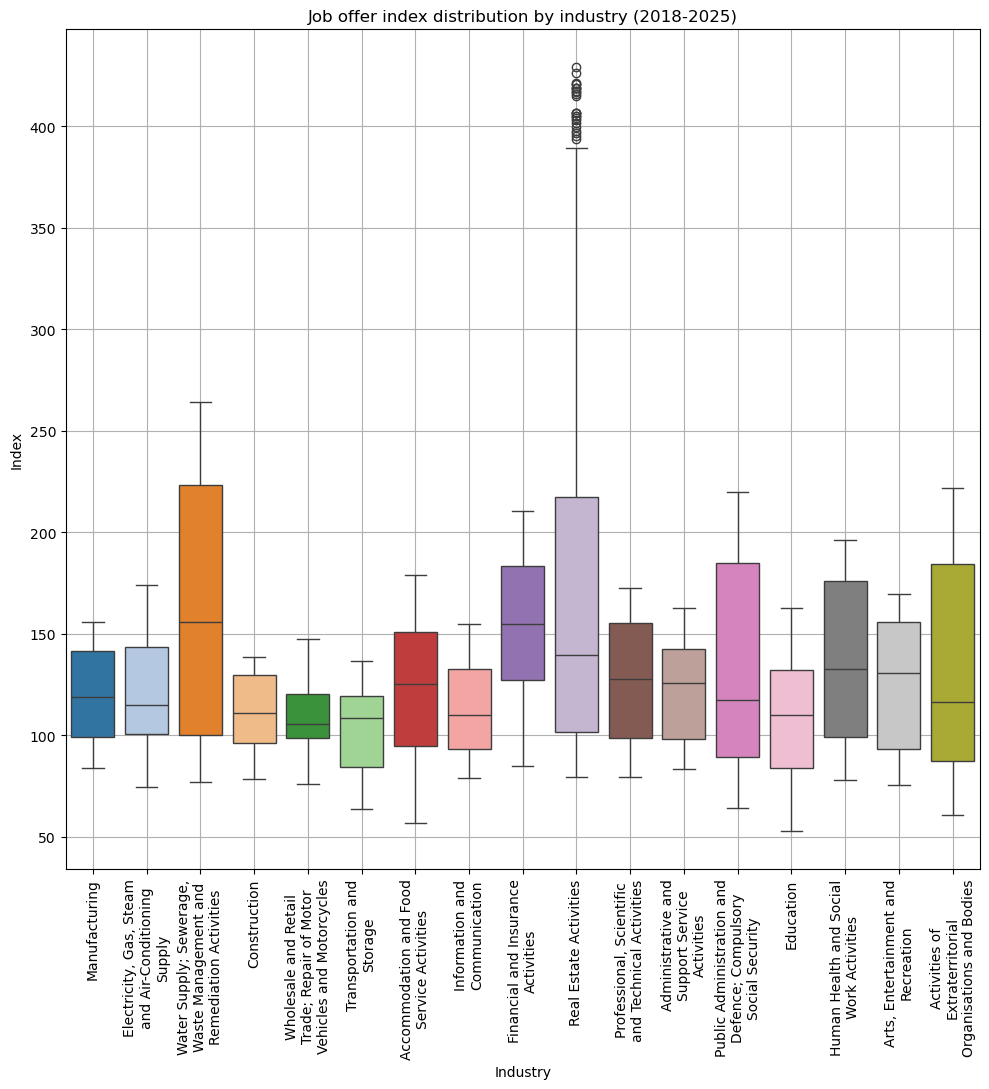

In [4]:
# === plotting the data ===
# index by canton
colors_cantons = sns.color_palette("Set1", 9) + sns.color_palette("Set2", 4) + sns.color_palette("Dark2", 8) + sns.color_palette("Paired", 5)
colors_cantons[5] = sns.color_palette("tab20b")[1]

cantons["date"] = pd.to_datetime(cantons["date"])
plt.figure(figsize=(16,8))
for i, col in enumerate(cantons_cols):
    plt.plot(cantons["date"], cantons[col], label=col, color=colors_cantons[i], linewidth=1)
plt.title("Evolution of job posting index by canton")
plt.ylabel("Index (1st week 2020 = 100)")
plt.xlabel("Time")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize="small")
plt.tight_layout()
plt.show()

# index by jobs
colors = sns.color_palette("tab10")

jobs["date"] = pd.to_datetime(jobs["date"])
plt.figure(figsize=(16,8))
for i, col in enumerate(jobs_cols):
    plt.plot(jobs["date"], jobs[col], label=col, color=colors[i], linewidth=1)
plt.title("Evolution of job posting index by job")
plt.ylabel("Index (1st week 2020 = 100)")
plt.xlabel("Time")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize="small")
plt.tight_layout()
plt.show()

# index by industry
colors = sns.color_palette("tab20")

industries["date"] = pd.to_datetime(industries["date"])
plt.figure(figsize=(16,8))
for i, col in enumerate(industries_cols):
    plt.plot(industries["date"], industries[col], label=col, color=colors[i], linewidth=1)
plt.title("Evolution of job posting index by industry")
plt.ylabel("Index (1st week 2020 = 100)")
plt.xlabel("Time")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize="small")
plt.tight_layout()
plt.show()

# boxplot for cantons
cantons_long = cantons.melt(id_vars="date", var_name="Canton", value_name="Index")

plt.figure(figsize=(16,8))
sns.boxplot(data=cantons_long, x="Canton", y="Index", hue="Canton", palette=colors_cantons)
plt.title("Job offer index distribution by canton (2018-2025)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# boxplot for jobs
def wrap_label(label, max_char=20):
    words = label.split()
    lines = []
    line = ""
    for word in words:
        if len(line + " " + word) <= max_char:
            line += " " + word if line else word
        else:
            lines.append(line)
            line = word
    lines.append(line)
    return "\n".join(lines)

jobs_long = jobs.melt(id_vars="date", var_name="Job", value_name="Index")
jobs_long["Job"] = jobs_long["Job"].apply(lambda x: wrap_label(x, max_char=25))

plt.figure(figsize=(8,10))
sns.boxplot(data=jobs_long, x="Job", y="Index", hue="Job", palette="tab10")
plt.title("Job offer index distribution by job (2018-2025)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# boxplot for industries
industries_long = industries.melt(id_vars="date", var_name="Industry", value_name="Index")
industries_long["Industry"] = industries_long["Industry"].apply(lambda x: wrap_label(x, max_char=25))

plt.figure(figsize=(10,11))
sns.boxplot(data=industries_long, x="Industry", y="Index", hue="Industry", palette="tab20")
plt.title("Job offer index distribution by industry (2018-2025)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

## Results and interpretation
### Line graphs
By looking at the line graphs, we can see that prior to 2020, the job offers were almost flat with a slight increase over time for the offers by canton and industries, and quite significantly increasing over time for the offers by job type. The pre 2020 job posting evolution is roughly comprised between 50 and 150 %. Then, in the beginning of 2020 until almost mid 2020, there was an sudden sharp drop in the job postings, between 20 and up to 50 % drop in job postings only in a few weeks. This sudden drop in the job offers is most likely a consequence of the COVID-19 lockdown. Following this drop, there is a long increase in the job postings until end of 2022 to 2023, ending with 50 to 150 % more job offers than during 2020. Then, since 2023, job offers decreased by about 30 %. There is however one exception to that last decrease: actually since 2023, the job postings in real estate activities have exploded, showing a really sharp increase during the first half of 2024, of more than 200 %, before slightly decreasing.

### Boxplots
The boxplots are basically some sort of summary of the line graphs and the evolution of job postings between 2018 and 2025, and the descriptive statistics. A first general observation that can be made: absolutely all medians, and all the boxes in general, are above 100 %, meaning a general increase in job offers between 2018 and 2025. It was already quite obvious with the line graphs, but it is even more obvious with the boxplots.